In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import re
import time
import pandas as pd
import numpy as np

In [ ]:
options = Options()
options.add_experimental_option("detach",True)

In [ ]:
options = Options()
options.add_experimental_option("detach",True)

In [ ]:
url = 'https://www.coingecko.com/'

In [ ]:
url2 = 'https://www.coingecko.com/en/categories/meme-token'

In [ ]:
driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options = options)

In [ ]:
driver.get(url)
driver.maximize_window()

In [ ]:
#Create empty lists and reset lists
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []

In [ ]:
print(list1)
print(list2)
print(list3)
print(list4)
print(list5)
print(list6)

In [ ]:
#Scrape rank information
rank = driver.find_elements(By.CLASS_NAME, 'table-number') #WORKS
for ranks in rank:
        ranking = ranks.text
        if ranking == "#":
            continue
        else:
            print(ranking)
        list1.append(ranking)

In [ ]:
#Get Ticker information
namechart = driver.find_elements(By.CLASS_NAME,'d-lg-inline') #WORKS
for name in namechart:
    name = name.text
    print(name)
    list2.append(name) #WORKS

In [ ]:
#Get cryptocurrency price
price = driver.find_elements(By.XPATH, '//div[@class="tw-flex-1"]') #Updated
count = 0
for coinprice in price:
    count += 1
    prices = coinprice.text
    print(prices)
print(count)

In [ ]:
#Get 24hour volume
hour24 = driver.find_elements(By.CLASS_NAME, 'td-liquidity_score') #WORKS
for hours in hour24:
        hour = hours.text
        print(hour)

In [ ]:
#Get Market Cap
mktcap = driver.find_elements(By.CLASS_NAME, 'td-market_cap')
for cap in mktcap:
        mkt = cap.text
        print(mkt)

In [ ]:
#Get FDV and FDV/MTKcap
fdv = driver.find_elements(By.XPATH, '//td[@class="td-fdv fdv text-right tw-block-inline"]')
for value in fdv:
    valuation = value.text
    print(valuation)

In [ ]:
#Cick the show fdv option on the page
showfdv = driver.find_element(By.XPATH, '//button[@data-action="gecko-table#showFdv"]')
showfdv.click()

In [ ]:
#Scrape range base coingecko - total pages 108
#May throw error but will scrape
showfdv = driver.find_element(By.XPATH, '//button[@data-action="gecko-table#showFdv"]')
showfdv.click()
for i in range(108):
    rank = driver.find_elements(By.CLASS_NAME, 'table-number') #WORKS
    namechart = driver.find_elements(By.CLASS_NAME,'d-lg-inline') #WORKS
    price = driver.find_elements(By.XPATH, '//div[@class="tw-flex-1"]') #Updated
    hour24 = driver.find_elements(By.CLASS_NAME, 'td-liquidity_score') #WORKS
    mktcap = driver.find_elements(By.CLASS_NAME, 'td-market_cap') #WORKS
    fdv = driver.find_elements(By.XPATH, '//td[@class="td-fdv fdv text-right tw-block-inline"]') #WORKS
    nextpage = driver.find_element(By.XPATH, '//a[@aria-label="next"]')
    
    #Append data to list
    for ranks in rank:
        ranking = ranks.text
        if ranking == "#":
            continue
        else:
            #print(ranking)
            list1.append(ranking)
        
    for name in namechart:
        name = name.text
        #print(name)
        list2.append(name) #WORKS
        
    for coinprice in price:
        prices = coinprice.text
        #print(prices)
        list3.append(prices)
    
    for hours in hour24:
        hour = hours.text
        #print(hour)
        list4.append(hour)
    
    for cap in mktcap:
        mkt = cap.text
        #print(mkt)
        list5.append(mkt)
    
    for value in fdv:
        valuation = value.text
        #print(valuation)
        list6.append(valuation)
    
    nextpage.click()
    time.sleep(2)

In [ ]:
#Create dataframes
df2 = pd.DataFrame(list1)
df3 = pd.DataFrame(list2)
df4 = pd.DataFrame(list3)
df5 = pd.DataFrame(list4)
df6 = pd.DataFrame(list5)
df7 = pd.DataFrame(list6)

In [ ]:
#Drop extra empty row values
df4edit = df4.copy()
df4edit.columns = ["price"]
df4edit.replace('', np.nan, inplace=True)
df4edit.dropna(subset=['price'], inplace=True)
df4edit.reset_index(drop = True, inplace = True)

In [ ]:
#Split df7
df8 = df7.copy()
df8 = df7[df7.index % 2 == 0]
df9 = df7[df7.index % 2 != 0]
df8.reset_index(drop = True, inplace = True)
df9.reset_index(drop = True, inplace = True)

In [ ]:
#Rename Columns
df2.columns = ["Rank"]
df3.columns = ["Ticker"]
df5.columns = ["24h_Volume"]
df6.columns = ["Mtk_Cap"]
df8.columns = ["fdv"]
df9.columns = ["fdv_mkt"]

In [ ]:
#Combine dataframes
df10 = pd.concat([df2,df3,df4edit,df5,df6,df8,df9], axis = 1)
df10.head(20)

In [ ]:
#Export scraped data to csv
df10.to_csv("C:\\Users\\jared\\OneDrive\\Documents\\Spring 2023\\BANA 780\\Download Files\\CoinGeckoBase.csv", index = False)

In [ ]:
#Create empty lists and reset lists
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []

In [ ]:
print(list1)
print(list2)
print(list3)
print(list4)
print(list5)
print(list6)

In [ ]:
#Get memecoin url
driver.get(url2)

In [ ]:
##Scrape range memecoin - total pages 2
#Will throw error but will scrape
showfdv = driver.find_element(By.XPATH, '//button[@data-action="gecko-table#showFdv"]')
showfdv.click()
for i in range(2):
    rank = driver.find_elements(By.CLASS_NAME, 'table-number') #WORKS
    namechart = driver.find_elements(By.CLASS_NAME,'d-lg-inline') #WORKS
    price = driver.find_elements(By.XPATH, '//div[@class="tw-flex-1"]') #Updated
    hour24 = driver.find_elements(By.CLASS_NAME, 'td-liquidity_score') #WORKS
    mktcap = driver.find_elements(By.CLASS_NAME, 'td-market_cap') #WORKS
    fdv = driver.find_elements(By.XPATH, '//td[@class="td-fdv fdv text-right tw-block-inline"]') #WORKS
    nextpage = driver.find_element(By.XPATH, '//a[@aria-label="next"]')
    
    #Append data to list
    for ranks in rank:
        ranking = ranks.text
        if ranking == "#":
            continue
        else:
            #print(ranking)
            list1.append(ranking)
        
    for name in namechart:
        name = name.text
        #print(name)
        list2.append(name) #WORKS
        
    for coinprice in price:
        prices = coinprice.text
        #print(prices)
        list3.append(prices)
    
    for hours in hour24:
        hour = hours.text
        #print(hour)
        list4.append(hour)
    
    for cap in mktcap:
        mkt = cap.text
        #print(mkt)
        list5.append(mkt)
    
    for value in fdv:
        valuation = value.text
        #print(valuation)
        list6.append(valuation)
    
    nextpage.click()
    time.sleep(2)

In [ ]:
#Create dataframes
df2 = pd.DataFrame(list1)
df3 = pd.DataFrame(list2)
df4 = pd.DataFrame(list3)
df5 = pd.DataFrame(list4)
df6 = pd.DataFrame(list5)
df7 = pd.DataFrame(list6)

In [ ]:
#Drop extra empty row values
df4edit = df4.copy()
df4edit.columns = ["price"]
df4edit.replace('', np.nan, inplace=True)
df4edit.dropna(subset=['price'], inplace=True)
df4edit.reset_index(drop = True, inplace = True)

In [ ]:
#Split df7
df8 = df7.copy()
df8 = df7[df7.index % 2 == 0]
df9 = df7[df7.index % 2 != 0]
df8.reset_index(drop = True, inplace = True)
df9.reset_index(drop = True, inplace = True)

In [ ]:
#Rename Columns
df2.columns = ["Rank"]
df3.columns = ["Ticker"]
df5.columns = ["24h_Volume"]
df6.columns = ["Mtk_Cap"]
df8.columns = ["fdv"]
df9.columns = ["fdv_mkt"]

In [ ]:
#Export scraped data to csv
df10.to_csv("C:\\Users\\jared\\OneDrive\\Documents\\Spring 2023\\BANA 780\\Download Files\\MemeCoin.csv", index = False)

In [ ]:
#Import csv
df = pd.read_csv("C:\\Users\\jared\\OneDrive\\Documents\\Spring 2023\\BANA 780\\Download Files\\CoinGeckoBase.csv")

In [ ]:
#Create copy of dataframe
df1 = df.copy()

In [ ]:
#Check datatypes
df1.dtypes

In [ ]:
#Change datatypes to string
df1["Ticker"]= df1["Ticker"].astype("string")
df1["price"] = df1["price"].astype("string")
df1["24h_Volume"] = df1["24h_Volume"].astype("string")
df1["Mtk_Cap"] = df1["Mtk_Cap"].astype("string")
df1["fdv"] = df1["fdv"].astype("string")
df1["fdv_mkt"] = df1["fdv_mkt"].astype("string")

In [ ]:
#Create regex patterns
pattern1 = r"[$,]"
pattern3 = r"[)]"
pattern4 = r"[(]"
pattern2 = r"[-]"

In [ ]:
#Applying regex patterns to clean data
df1["price"] = df1["price"].str.replace(pattern1, '', regex = True).str.strip()
df1["24h_Volume"] = df1["24h_Volume"].str.replace(pattern1, '', regex = True).str.strip()
df1["Mtk_Cap"] = df1["Mtk_Cap"].str.replace(pattern1, '', regex = True).str.strip()
df1["fdv"] = df1["fdv"].str.replace(pattern1, '', regex = True).str.strip()

In [ ]:
df1["price"] = df1["price"].str.replace(pattern2, '0', regex = True).str.strip()
df1["24h_Volume"] = df1["24h_Volume"].str.replace(pattern2, '0', regex = True).str.strip()
df1["Mtk_Cap"] = df1["Mtk_Cap"].str.replace(pattern2, '0', regex = True).str.strip()
df1["fdv"] = df1["fdv"].str.replace(pattern2, '0', regex = True).str.strip()
df1["fdv_mkt"] = df1["fdv_mkt"].str.replace(pattern2, '0', regex = True).str.strip()

In [ ]:
df1["price"] = df1["price"].str.replace(pattern3, '', regex = True).str.strip()
df1["24h_Volume"] = df1["24h_Volume"].str.replace(pattern3, '', regex = True).str.strip()
df1["Mtk_Cap"] = df1["Mtk_Cap"].str.replace(pattern3, '', regex = True).str.strip()
df1["fdv"] = df1["fdv"].str.replace(pattern3, '', regex = True).str.strip()
df1["fdv_mkt"] = df1["fdv_mkt"].str.replace(pattern3, '', regex = True).str.strip()

In [ ]:
df1["price"] = df1["price"].str.replace(pattern4, '-', regex = True).str.strip()
df1["24h_Volume"] = df1["24h_Volume"].str.replace(pattern4, '-', regex = True).str.strip()
df1["Mtk_Cap"] = df1["Mtk_Cap"].str.replace(pattern4, '-', regex = True).str.strip()
df1["fdv"] = df1["fdv"].str.replace(pattern4, '-', regex = True).str.strip()
df1["fdv_mkt"] = df1["fdv_mkt"].str.replace(pattern4, '-', regex = True).str.strip()

In [ ]:
#Change datatypes to float64
df1["price"] = df1["price"].astype("float64")
df1["24h_Volume"] = df1["24h_Volume"].astype("float64")
df1["Mtk_Cap"] = df1["Mtk_Cap"].astype("float64")
df1["fdv"] = df1["fdv"].astype("float64")
df1["fdv_mkt"] = df1["fdv_mkt"].astype("float64")

In [ ]:
df1

In [ ]:
#Export cleaned dataset to csv
df1.to_csv("C:\\Users\\jared\\OneDrive\\Documents\\Spring 2023\\BANA 780\\Download Files\\CoinGeckoBaseClean.csv", index = False)

In [ ]:
#Repeat process with memecoin dataset
df11 = pd.read_csv("C:\\Users\\jared\\OneDrive\\Documents\\Spring 2023\\BANA 780\\Download Files\\MemeCoin.csv")

In [ ]:
df11["Ticker"]= df11["Ticker"].astype("string")
df11["price"] = df11["price"].astype("string")
df11["24h_Volume"] = df11["24h_Volume"].astype("string")
df11["Mtk_Cap"] = df11["Mtk_Cap"].astype("string")
df11["fdv"] = df11["fdv"].astype("string")
df11["fdv_mkt"] = df11["fdv_mkt"].astype("string")

In [ ]:
df11["price"] = df11["price"].str.replace(pattern1, '', regex = True).str.strip()
df11["24h_Volume"] = df11["24h_Volume"].str.replace(pattern1, '', regex = True).str.strip()
df11["Mtk_Cap"] = df11["Mtk_Cap"].str.replace(pattern1, '', regex = True).str.strip()
df11["fdv"] = df11["fdv"].str.replace(pattern1, '', regex = True).str.strip()

In [ ]:
df11["price"] = df11["price"].str.replace(pattern2, '0', regex = True).str.strip()
df11["24h_Volume"] = df11["24h_Volume"].str.replace(pattern2, '0', regex = True).str.strip()
df11["Mtk_Cap"] = df11["Mtk_Cap"].str.replace(pattern2, '0', regex = True).str.strip()
df11["fdv"] = df11["fdv"].str.replace(pattern2, '0', regex = True).str.strip()
df11["fdv_mkt"] = df11["fdv_mkt"].str.replace(pattern2, '0', regex = True).str.strip()

In [ ]:
df11["price"] = df11["price"].str.replace(pattern3, '', regex = True).str.strip()
df11["24h_Volume"] = df11["24h_Volume"].str.replace(pattern3, '', regex = True).str.strip()
df11["Mtk_Cap"] = df11["Mtk_Cap"].str.replace(pattern3, '', regex = True).str.strip()
df11["fdv"] = df11["fdv"].str.replace(pattern3, '', regex = True).str.strip()
df11["fdv_mkt"] = df11["fdv_mkt"].str.replace(pattern3, '', regex = True).str.strip()

In [ ]:
df11["price"] = df11["price"].str.replace(pattern4, '-', regex = True).str.strip()
df11["24h_Volume"] = df11["24h_Volume"].str.replace(pattern4, '-', regex = True).str.strip()
df11["Mtk_Cap"] = df11["Mtk_Cap"].str.replace(pattern4, '-', regex = True).str.strip()
df11["fdv"] = df11["fdv"].str.replace(pattern4, '-', regex = True).str.strip()
df11["fdv_mkt"] = df11["fdv_mkt"].str.replace(pattern4, '-', regex = True).str.strip()

In [ ]:
#Drop unwanted rows
df11 = df11.drop(df11.tail(3).index)
df11.tail()

In [ ]:
df11["price"] = df11["price"].astype("float64")
df11["24h_Volume"] = df11["24h_Volume"].astype("float64")
df11["Mtk_Cap"] = df11["Mtk_Cap"].astype("float64")
df11["fdv"] = df11["fdv"].astype("float64")
df11["fdv_mkt"] = df11["fdv_mkt"].astype("float64")

In [ ]:
df11

In [ ]:
#Export cleaned dataset to csv
df11.to_csv("C:\\Users\\jared\\OneDrive\\Documents\\Spring 2023\\BANA 780\\Download Files\\MemeCoinClean.csv", index = False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
shitcoin_data = pd.read_csv("/content/final_dataset.csv")

In [ ]:
shitcoin_data.head()

Rank Ticker     price    24h_Volume       Mtk_Cap           fdv  fdv_mkt  \
0   1.0    BTC  29627.22  3.098259e+10  5.662990e+11  6.143430e+11     0.92   
1   2.0    ETH   1918.24  1.868343e+10  2.300230e+11  2.300230e+11     1.00   
2   3.0   USDT      1.00  4.296886e+10  8.187339e+10  8.187339e+10     1.00   
3   4.0    BNB    334.45  1.507108e+09  5.264595e+10  6.668844e+10     0.79   
4   5.0   USDC      1.00  6.147207e+09  3.052131e+10  3.051928e+10     1.00   

   meme_coin  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
shitcoin_data.head()

Rank Ticker    price     24h_Volume         Mtk_Cap             fdv  \
0  1.00    BTC 29627.22 30982594407.00 566299000000.00 614343000000.00   
1  2.00    ETH  1918.24 18683433915.00 230023000000.00 230023000000.00   
2  3.00   USDT     1.00 42968859467.00  81873392805.00  81873392805.00   
3  4.00    BNB   334.45  1507107856.00  52645946607.00  66688437535.00   
4  5.00   USDC     1.00  6147207092.00  30521305771.00  30519284292.00   

   fdv_mkt  meme_coin  
0     0.92       0.00  
1     1.00       0.00  
2     1.00       0.00  
3     0.79       0.00  
4     1.00       0.00

In [ ]:
correlation_matrix = shitcoin_data.corr()

<ipython-input-6-dbc4614b2c6c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = shitcoin_data.corr()


In [ ]:
print(correlation_matrix)

            Rank  price  24h_Volume  Mtk_Cap   fdv  fdv_mkt  meme_coin
Rank        1.00  -0.05       -0.06    -0.06 -0.06    -0.27      -0.01
price      -0.05   1.00       -0.00    -0.00 -0.00    -0.01      -0.00
24h_Volume -0.06  -0.00        1.00     0.73  0.00     0.07      -0.00
Mtk_Cap    -0.06  -0.00        0.73     1.00  0.00     0.06       0.00
fdv        -0.06  -0.00        0.00     0.00  1.00    -0.01      -0.00
fdv_mkt    -0.27  -0.01        0.07     0.06 -0.01     1.00       0.11
meme_coin  -0.01  -0.00       -0.00     0.00 -0.00     0.11       1.00


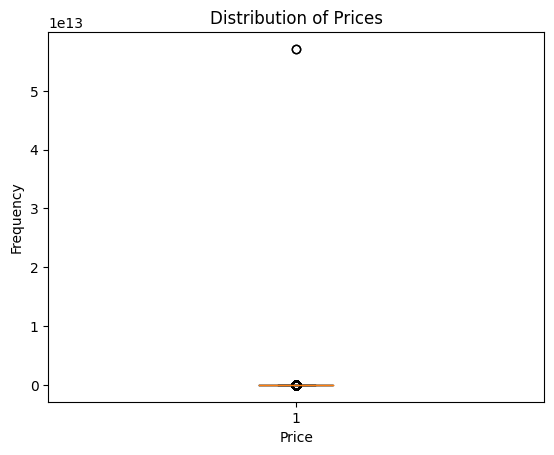

In [ ]:
plt.boxplot(shitcoin_data['price'])
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(shitcoin_data.isnull().sum())

Rank          7016
Ticker           1
price            0
24h_Volume       0
Mtk_Cap          0
fdv              0
fdv_mkt          0
meme_coin        0
dtype: int64


In [ ]:
shitcoin_data = shitcoin_data.drop_duplicates()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
shitcoin_data[['24h_Volume', 'Mtk_Cap', 'fdv', 'price']] = scaler.fit_transform(shitcoin_data[['24h_Volume', 'Mtk_Cap', 'fdv', 'price']])


In [ ]:
shitcoin_data.head()

Rank Ticker  price  24h_Volume  Mtk_Cap  fdv  fdv_mkt  meme_coin
0  1.00    BTC   0.00        0.72     1.00 0.00     0.92       0.00
1  2.00    ETH   0.00        0.43     0.41 0.00     1.00       0.00
2  3.00   USDT   0.00        1.00     0.14 0.00     1.00       0.00
3  4.00    BNB   0.00        0.04     0.09 0.00     0.79       0.00
4  5.00   USDC   0.00        0.14     0.05 0.00     1.00       0.00

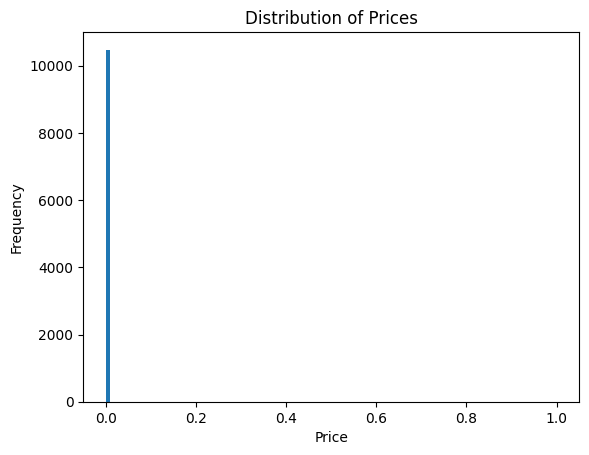

In [ ]:
plt.hist(shitcoin_data['price'], bins = 100)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

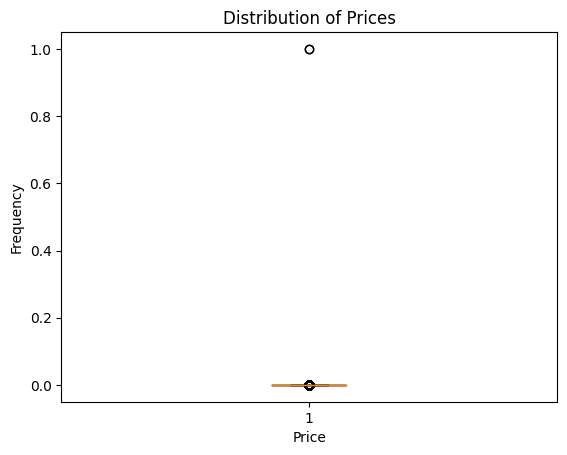

In [ ]:
plt.boxplot(shitcoin_data['price'])
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<ipython-input-17-9bc70dd89397>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = shitcoin_data.corr()


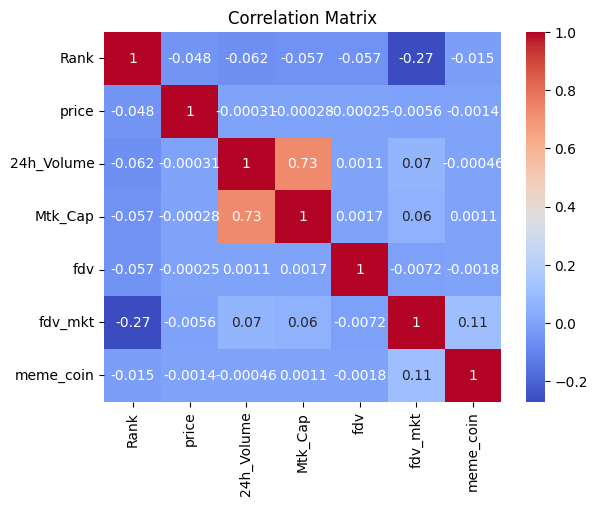

In [ ]:
# Calculate the correlation matrix
import seaborn as sns
corr_matrix = shitcoin_data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


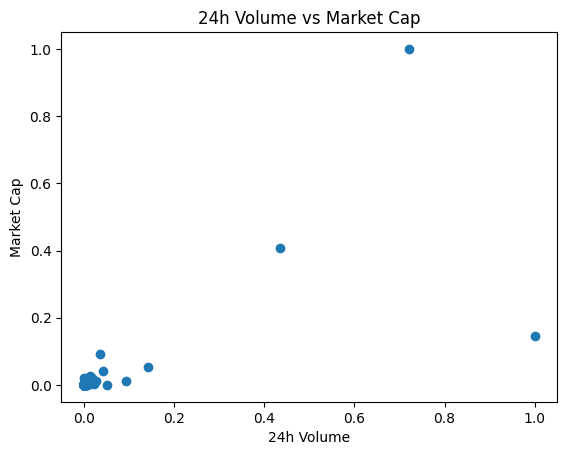

In [ ]:
# Create a scatter plot of 24h_volume against mtk_cap
plt.scatter(shitcoin_data['24h_Volume'], shitcoin_data['Mtk_Cap'])
plt.title('24h Volume vs Market Cap')
plt.xlabel('24h Volume')
plt.ylabel('Market Cap')
plt.show()

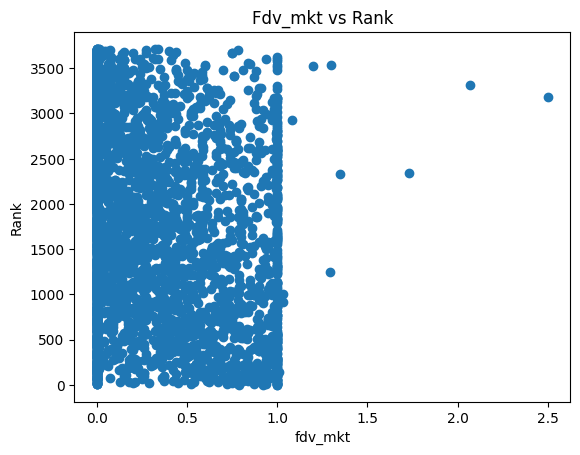

In [ ]:
plt.scatter(shitcoin_data['fdv_mkt'], shitcoin_data['Rank'])
plt.title('Fdv_mkt vs Rank')
plt.xlabel('fdv_mkt')
plt.ylabel('Rank')
plt.show()

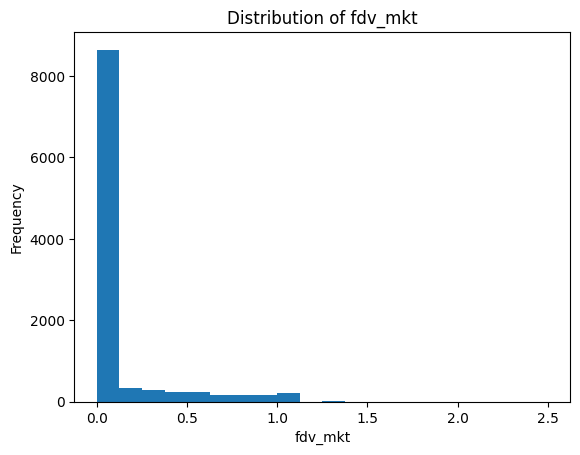

In [ ]:
# Create a histogram of mtk_cap distribution
plt.hist(shitcoin_data['fdv_mkt'], bins=20)
plt.title('Distribution of fdv_mkt')
plt.xlabel('fdv_mkt')
plt.ylabel('Frequency')
plt.show()


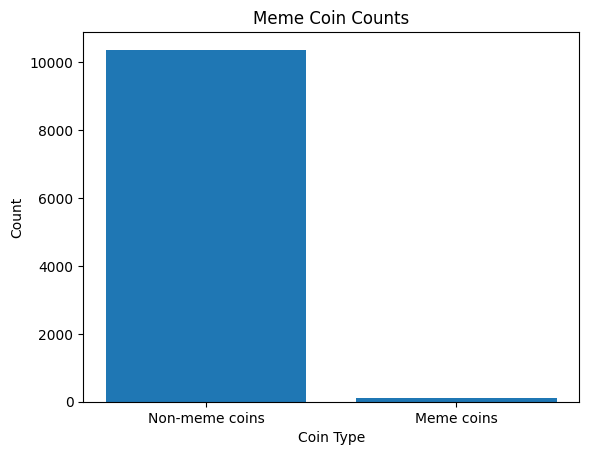

In [ ]:
# Count the number of meme coins in the DataFrame
meme_coin_count = sum(shitcoin_data['meme_coin'] == 1)

# Create a bar graph of meme coin counts
plt.bar(['Non-meme coins', 'Meme coins'], [len(shitcoin_data) - meme_coin_count, meme_coin_count])
plt.title('Meme Coin Counts')
plt.xlabel('Coin Type')
plt.ylabel('Count')
plt.show()


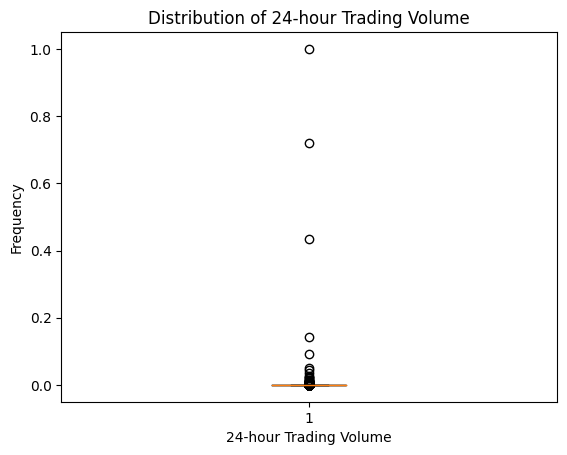

In [ ]:
# Create a histogram of 24h_Volume distribution
plt.boxplot(shitcoin_data['24h_Volume'])
plt.title('Distribution of 24-hour Trading Volume')
plt.xlabel('24-hour Trading Volume')
plt.ylabel('Frequency')
plt.show()


<Axes: xlabel='24h_Volume', ylabel='meme_coin'>

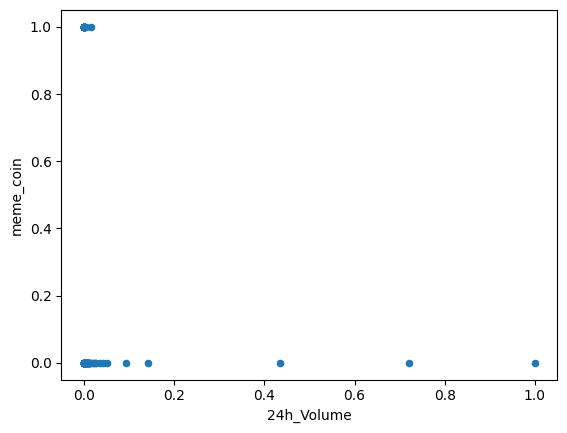

In [ ]:
shitcoin_data.plot.scatter(x='24h_Volume',y='meme_coin')

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
shitcoin_data.head()

Rank Ticker  price  24h_Volume  Mtk_Cap  fdv  fdv_mkt  meme_coin
0  1.00    BTC   0.00        0.72     1.00 0.00     0.92       0.00
1  2.00    ETH   0.00        0.43     0.41 0.00     1.00       0.00
2  3.00   USDT   0.00        1.00     0.14 0.00     1.00       0.00
3  4.00    BNB   0.00        0.04     0.09 0.00     0.79       0.00
4  5.00   USDC   0.00        0.14     0.05 0.00     1.00       0.00

In [ ]:
shitcoin_data = shitcoin_data.fillna(0)

In [ ]:
# 4. Split data into training and test sets
# notice the different ways you can refer to a column: df.columnname or df['columnname']
y = shitcoin_data.meme_coin # data['quality']
X = shitcoin_data.drop(['meme_coin', 'Ticker'], axis=1)

# this function (train_test_split) randomly selects subsets of the data for training purposes
# stratify
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    stratify=y)


In [ ]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.coef_

array([ 8.70703194e-07, -4.83814411e-03, -5.79311192e-02,  6.74837857e-03,
       -7.30291109e-03,  4.10805432e-02])

In [ ]:
pred = reg.predict(X_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))

0.015981904265382485
0.00930428762036822


<Axes: >

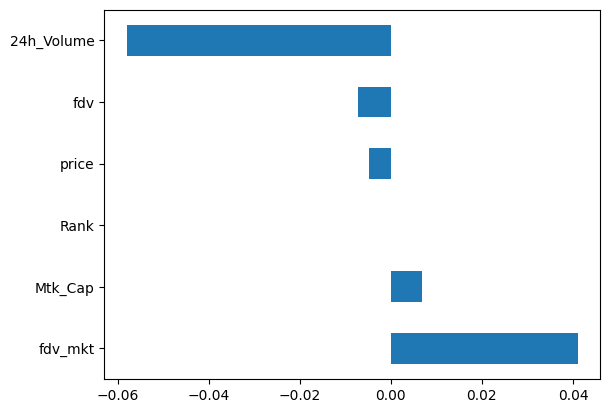

In [ ]:
%matplotlib inline
feat_importances = pd.Series(reg.coef_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [ ]:
svr.score(X_train,y_train)

-0.8690534145126925

In [ ]:
pred = svr.predict(X_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))

-0.8689810832269476
0.017671969276529143


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#create a random forest model and fit it to the standardized training data
rfclass = RandomForestClassifier(n_estimators=300)
rfclass.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
pred = rfclass.predict(X_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))

-0.06012048192771102
0.010023866348448688


<Axes: >

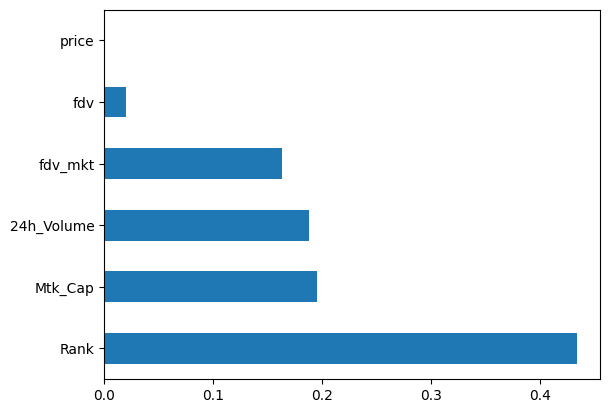

In [ ]:
feat_importances = pd.Series(rfclass.feature_importances_,index = rfclass.feature_names_in_)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
rfclass.feature_names_in_

array(['Rank', 'price', '24h_Volume', 'Mtk_Cap', 'fdv', 'fdv_mkt'],
      dtype=object)

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(shitcoin_data[rfclass.feature_names_in_].astype(float).values,  
mode='classification',training_labels=shitcoin_data['meme_coin'],feature_names=rfclass.feature_names_in_,class_names=rfclass.classes_)

In [ ]:
i = 1
exp = explainer.explain_instance(shitcoin_data.loc[i,rfclass.feature_names_in_].astype(float).values, rfclass.predict_proba, num_features=6)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfreg = RandomForestRegressor(n_estimators=100,max_depth=2)

rfreg.fit(X_train, y_train)

RandomForestRegressor(max_depth=2)

In [ ]:
pred = rfreg.predict(X_test)
print(rfreg.score(X_test,y_test))
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))

0.008382670173599838
0.008382670173599838
0.009376141440934058


In [ ]:
def prob(shitcoin_data):
    return np.array(list(zip(1-rfreg.predict(data),rfreg.predict(data))))

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=a07cda64872a94c5b7cae74b168d621c18a1b3afd524c8754cfe39c2f34cbb78
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(shitcoin_data[rfreg.feature_names_in_].astype(float).values,  
mode='regression',training_labels=shitcoin_data['meme_coin'],feature_names=rfreg.feature_names_in_)

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train[rfreg.feature_names_in_].astype(float).values,  
mode='regression',training_labels=y_train,feature_names=rfreg.feature_names_in_)

In [ ]:
print(rfreg.predict([X_train.loc[2]]))

[0.0394326]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
i=2
shitcoin_data.loc[i,rfreg.feature_names_in_]

Rank         3.00
price        0.00
24h_Volume   1.00
Mtk_Cap      0.14
fdv          0.00
fdv_mkt      1.00
Name: 2, dtype: object

In [ ]:
i = 2
exp2 = explainer.explain_instance(shitcoin_data.loc[i,rfreg.feature_names_in_].astype(float).values, rfreg.predict, num_features=6)
exp2.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
i = 3
exp2 = explainer.explain_instance(shitcoin_data.loc[i,rfreg.feature_names_in_].astype(float).values, rfreg.predict, num_features=6)
exp2.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
i = 1449
exp2 = explainer.explain_instance(shitcoin_data.loc[i,rfreg.feature_names_in_].astype(float).values, rfreg.predict, num_features=6)
exp2.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
ypred = rfreg.predict(X_train)
y_train[y_train <4]

8612    0.00
3297    0.00
983     0.00
6290    0.00
10422   0.00
        ... 
1340    0.00
2232    0.00
1672    0.00
4461    0.00
138     0.00
Name: meme_coin, Length: 8380, dtype: float64

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.4 MB/s eta 0:00:00


In [ ]:
import shap


In [ ]:
pred = rfreg.predict(X_train)
explainer = shap.TreeExplainer(rfreg)
shap_values = explainer.shap_values(X_train)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

1.3877787807814457e-16

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


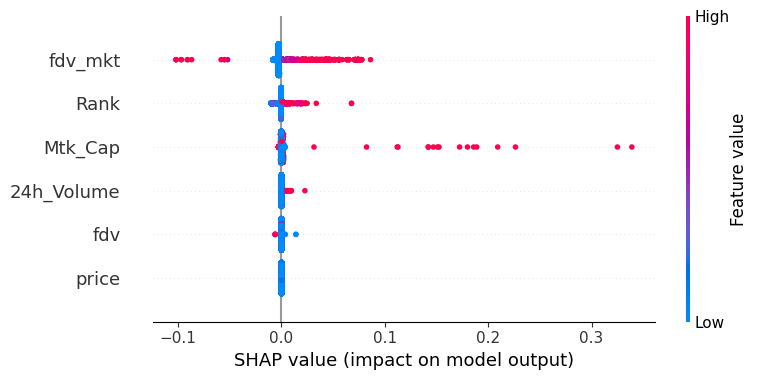

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

In [ ]:
explainer = shap.Explainer(rfreg.predict, X100)
shap_values = explainer(X)


Exact explainer: 10476it [05:48, 30.06it/s]                           


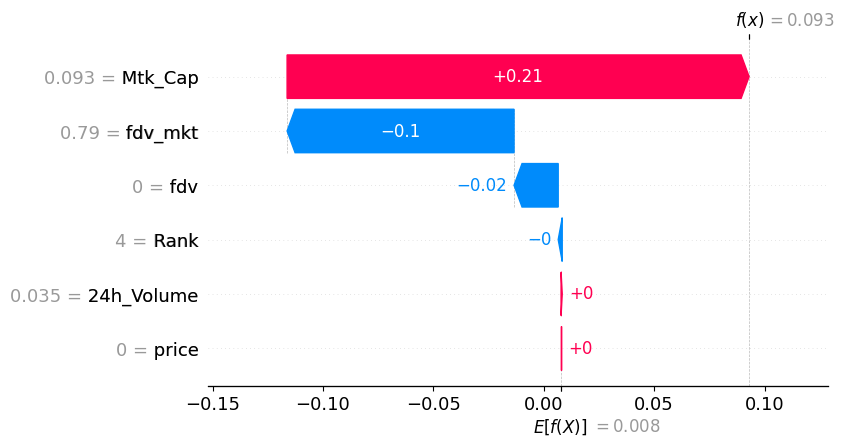

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
sample_ind = 3
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

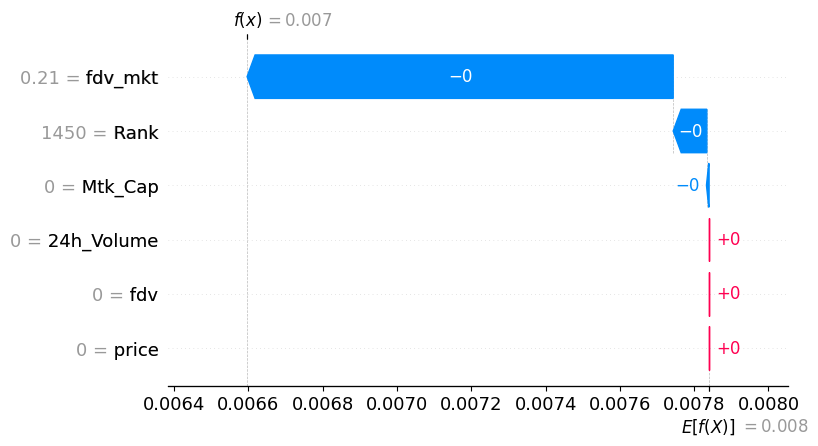

In [ ]:
sample_ind = 1449
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

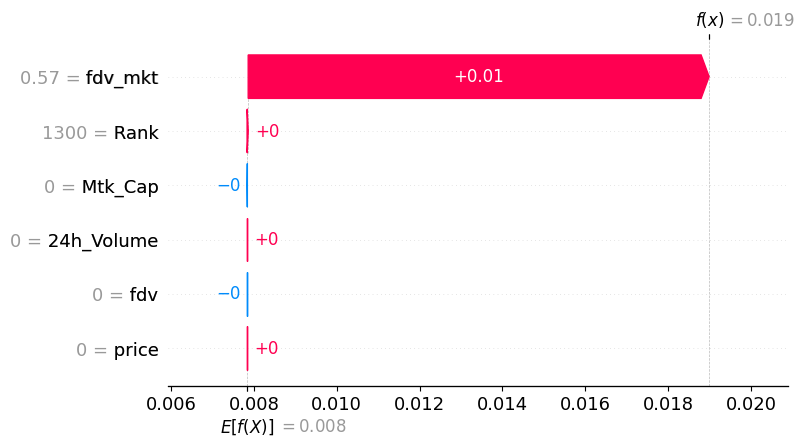

In [ ]:
sample_ind = 1299
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [ ]:
from sklearn.inspection import permutation_importance
import time
start_time = time.time()
result = permutation_importance(
    rfclass, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=rfclass.feature_names_in_)

Elapsed time to compute the importances: 5.293 seconds


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
y = shitcoin_data.meme_coin # data['quality']
X = shitcoin_data.drop(['meme_coin','Ticker','Rank'], axis=1) # axis 1 refers to a column rather than a row
# this function (train_test_split) randomly selects subsets of the data for training purposes
# stratify
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=123,
                                                    stratify=y)

In [ ]:
est = HistGradientBoostingRegressor().fit(X, y)
est.score(X, y)

0.25317940592446386

In [ ]:
clf = HistGradientBoostingClassifier().fit(X, y)
clf.score(X, y)

0.9911217183770883

In [ ]:
import lime
import lime.lime_tabular
import warnings


In [ ]:
X_train.columns

Index(['price', '24h_Volume', 'Mtk_Cap', 'fdv', 'fdv_mkt'], dtype='object')

In [ ]:
y_train.unique()

array([0., 1.])

In [ ]:
import keras.models
import tensorflow
from keras.models import Sequential
from keras.layers import Activation, Dense

In [ ]:
# Define the neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
197/197 [==============================] - 4s 10ms/step - loss: 0.2312 - accuracy: 0.9887 - val_loss: 0.0635 - val_accuracy: 0.9905
Epoch 2/50
197/197 [==============================] - 1s 5ms/step - loss: 0.0580 - accuracy: 0.9905 - val_loss: 0.0540 - val_accuracy: 0.9905
Epoch 3/50
197/197 [==============================] - 1s 3ms/step - loss: 0.0524 - accuracy: 0.9905 - val_loss: 0.0500 - val_accuracy: 0.9905
Epoch 4/50
197/197 [==============================] - 1s 4ms/step - loss: 0.0511 - accuracy: 0.9905 - val_loss: 0.0492 - val_accuracy: 0.9905
Epoch 5/50
197/197 [==============================] - 1s 4ms/step - loss: 0.0513 - accuracy: 0.9905 - val_loss: 0.0496 - val_accuracy: 0.9905
Epoch 6/50
197/197 [==============================] - 1s 3ms/step - loss: 0.0513 - accuracy: 0.9905 - val_loss: 0.0495 - val_accuracy: 0.9905
Epoch 7/50
197/197 [==============================] - 1s 3ms/step - loss: 0.0512 - accuracy: 0.9905 - val_loss: 0.0493 - val_accuracy: 0.9905
Epoch

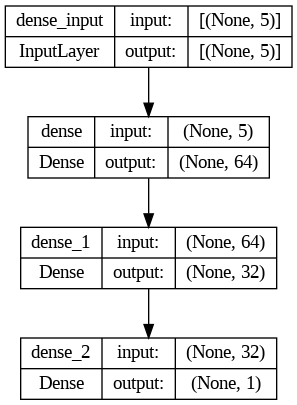

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True)

4/4 [==============================] - 0s 4ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

44/44 [==============================] - 0s 2ms/step


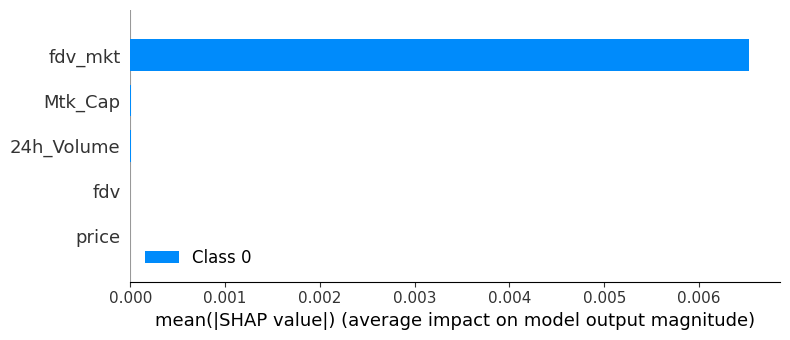

In [ ]:
# Create shap explainer and get shap values
explainer = shap.KernelExplainer(model.predict, X_train[:100])
shap_values = explainer.shap_values(X_test[:100])

# Visualize the shap summary plot
shap.summary_plot(shap_values, X_test[:100])